In [311]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

In [312]:
data = pd.read_csv('C:/Users/pandaonymous/Desktop/New/3.csv')

In [313]:
cols = [12,16,17,22,24,25]
data = data[data.columns[cols]]
data = data.dropna()

In [314]:
data

,Sex,Age_Code,Age,Weight_in_kg,length_height_code,Length_height_cm
0,Female,Year,25,41.000000,Height,137.000000
1,Female,Months,9,7.000000,Length,70.000000
2,Male,Months,4,5.400000,Length,62.000000
3,Female,Months,6,7.500000,Length,68.400002
4,Male,Year,29,64.199997,Height,157.500000
...,...,...,...,...,...,...
5873,Male,Year,3,14.100000,Height,97.000000
5874,Female,Year,1,8.900000,Height,80.800003
5875,Female,Year,21,38.599998,Height,151.600010
5876,Male,Year,1,88.099998,Height,73.199997


In [315]:
data = data.loc[data['length_height_code'] == 'Height']
data['Height_m'] = data['Length_height_cm']/100

<ipython-input-315-9f63554c64b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Height_m'] = data['Length_height_cm']/100


In [316]:
data['BMI'] = data['Weight_in_kg']/((data['Height_m'])*(data['Height_m']))

<ipython-input-316-6d8a56e60b97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BMI'] = data['Weight_in_kg']/((data['Height_m'])*(data['Height_m']))


In [317]:
temp_data = data.loc[data['BMI'] <45]

In [318]:
temp_data

,Sex,Age_Code,Age,Weight_in_kg,length_height_code,Length_height_cm,Height_m,BMI
0,Female,Year,25,41.000000,Height,137.000000,1.370,21.844531
4,Male,Year,29,64.199997,Height,157.500000,1.575,25.880573
5,Female,Year,27,36.700001,Height,147.600010,1.476,16.845864
6,Male,Year,3,14.000000,Height,96.400002,0.964,15.065167
7,Female,Year,22,38.400002,Height,146.200000,1.462,17.965384
...,...,...,...,...,...,...,...,...
5872,Male,Year,2,11.700000,Height,92.500000,0.925,13.674215
5873,Male,Year,3,14.100000,Height,97.000000,0.970,14.985652
5874,Female,Year,1,8.900000,Height,80.800003,0.808,13.632240
5875,Female,Year,21,38.599998,Height,151.600010,1.516,16.795341


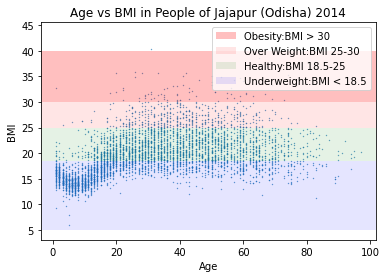

In [319]:
plt.scatter(temp_data.iloc[:,2].values,temp_data.iloc[:,7].values,s=0.1)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI in People of Jajapur (Odisha) 2014')
plt.axhspan(5,18.5, facecolor='b', alpha=0.1)
plt.axhspan(18.5,25, facecolor='g', alpha=0.1)
plt.axhspan(25,30, facecolor='r', alpha=0.1)
plt.axhspan(30,40, facecolor='r', alpha=0.25)
red_patch = mpatches.Patch(facecolor='r', alpha=0.25, label='Obesity:BMI > 30')
lightred_patch = mpatches.Patch(facecolor='r', alpha=0.1, label='Over Weight:BMI 25-30')
green_patch = mpatches.Patch(facecolor='g', alpha=0.1, label='Healthy:BMI 18.5-25')
blue_patch = mpatches.Patch(facecolor='b', alpha=0.1, label='Underweight:BMI < 18.5')
plt.legend(handles=[red_patch,lightred_patch,green_patch,blue_patch])
plt.savefig('Age vs BMI in People of Jajapur (Odisha) 2014.jpg',dpi = 400)
plt.show()